# Работа со словарем

In [310]:
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

In [311]:
input_file = 'bagv_dict.html'
dict_beginning = 521
dict_ending = 8265
#dict_ending = 621

language = 'Bagvalal'
glottolog = 'bagv1239'
reference = 'Magomedova 2004' 
contributor = 'A. Davidenko'

romanic = ['I', 'II', 'III']

header_list = ['id', 'language', 'glottolog', 'reference',
               'lemma_source', 'ending', 'pos', 'borrowing', 'dialect',
               'translation_ru', 'contributor', 'source']

dialect_list = ['(гим.)', '(кван.)', '(тлиб.)', '(тлис.)', '(тлон.)', 
                '(гим)', '(кван)', '(тлиб)', '(тлис)', '(тлон)', '(кван., гим.)']


In [312]:
def preprocessing(text):
    text = text.replace('<sup>Н</sup>', 'ᴴ')
    text = text.replace('<sup>н</sup>', 'ᴴ')
    text = text.replace('<sup>1</sup>', '¹')
    text = text.replace('<sup>2</sup>', '²')
    text = text.replace('<sup>2</sup>', '³')
    return text

In [313]:
def replacing(text):
    text = text.replace(': ²', ':́Э')      
    if text[0] == '²':
        text = '́Э' + text[1:]
    text = text.replace('ᴴ', 'ᴴ')
    text = text.replace('\xad', '')
    text = text.replace('/²', '/́Э')
    text = text.replace('3', '³')
    text = text.replace('\n', ' ')
    text = text.replace("P", "́И")
    text = text.replace('æ', '̄З')
    text = text.replace('È', "É")
    text = text.replace('E', 'Е')
    text = text.replace('A', '̄С')
    text = text.replace('Á̄I', '̄́А̄Л̄Ъ')
    text = text.replace('ÁI', '́А̄Л̄Ъ')
    text = text.replace('АI', 'А̄Л̄Ъ')
    text = text.replace('ЕÁ', '̄Л́А')
    text = text.replace('ЕÊ', '̄Л̄́А')
    text = text.replace('ЕА', 'Л̄А')
    text = text.replace('И´I', '́И ̄Л̄Ъ')
    text = text.replace('ᴴI', 'ᴴ̄Л̄Ъ')
    text = text.replace('Ą', '̄Р')
    text = text.replace('Ā', 'Ā')
    text = text.replace('À', 'Á')
    text = text.replace('ä', '̄Б')
    text = text.replace('Ê', 'Á̄')
    text = text.replace('X', 'Х')
    text = text.replace('R', '́И')
    text = text.replace('Ç', '̄́О')
    text = text.replace('N', 'X̄')
    text = text.replace('Ð', '̄С̄I')
    text = text.replace('Æ', 'Ē')
    text = text.replace('∙', '́У')
    text = text.replace('Z', 'Ӯ')
    text = text.replace('ã', '̄М')
    text = text.replace('ç', '̄Д')
    text = text.replace('V', '̄Ч')
    text = text.replace('Ë', '̄́Е')
    text = text.replace('J', '̄Ч̄I')
    text = text.replace('ć', "̄К̄I")
    text = text.replace('Í', '̄́И')
    text = text.replace("å", "̄Н")
    text = text.replace("ð", "̄К̄Ъ")
    text = text.replace("C", "̄К")
    text = text.replace("Ò", "́О")
    text = text.replace("Ē", "̄́Е")
    text = text.replace("M", "̄Ц̄I")
    text = text.replace("μ", "́У")
    text = text.replace("Î", "̄́У")
    text = text.replace("ċ", "̄Т̄I")
    text = text.replace("ЕЕ", "̄ЛЕ")
    text = text.replace("Нᴴ", "ᴴ")
    text = text.replace(' /', '/')
    text = text.replace('/ ', '/')
    text = text.replace(' :', ':')
    text = text.replace(': ', ':')
    text = text.replace(' )', ')')
    text = text.replace('( ', '(')
    text = text.replace('1', '')
    text = text.replace('2', '')
    text = text.replace('III', '')
    text = text.replace('II', '')
    if text[len(text)-1] == 'I':
        text = text[:1]      
    text = text.replace('~', '')
    return text

In [314]:
def not_lemma_replacing(text):
    text = text.replace('B', 'с̄')
    text = text.replace('S', 'ӣ')
    text = text.replace('F', 'л̄')
    text = text.replace('†', '́а̄')    
    text = text.replace('Н', 'л̄ъ̄')
    text = text.replace('Þ', 'н̄')
    text = text.replace('}', 'е́̄')
    text = text.replace('Y', 'ӣ')
    text = text.replace('[', 'ӯ')
    text = text.replace('ô', 'с̄Ī')
    return(text)

In [315]:
with open(input_file, 'r', encoding='utf-8') as f: 
    text = f.read()

In [316]:
text = preprocessing(text)

In [317]:
soup = bs(text,'html.parser')
lines = soup.find_all('p')

## Извлечение информации

In [318]:
i = dict_beginning
df_data = []
while i < dict_ending + 1:
    lemma_source = ''
    pos = ''
    borrowing = ''
    translation_ru = ''
    dialect = ''
    ending = ''
    text = replacing(lines[i].get_text())
        
    regBrackets = re.compile('\(.+?\)')
    brackets = regBrackets.findall(text)
    if len(brackets) > 0:
        if brackets[0] in dialect_list:
            dialect = brackets[0]
            text = text.replace(dialect, '')
        else:
            ending = brackets[0]
            text = text.replace(ending, '')
            ending = not_lemma_replacing(ending)
                    
    splitted_text = text.split()
    if len(splitted_text) > 1:
        lemma_source = splitted_text[0]
        text = text.replace (splitted_text[0], '')
        if ':' in splitted_text[0]:
            lemma_source = lemma_source + ' ' + splitted_text[1]
        elif splitted_text[1] in romanic:
            pos = 'noun ' + splitted_text[1]
            text = text.replace (splitted_text[1], '')
            
        translation_ru = not_lemma_replacing(text)
        str_line = str(lines[i]).replace('\n', ' ')
        
    if '//' in lemma_source:
        lemma_pieces = lemma_source.split('//')
        for piece in lemma_pieces:
            data = [i, language, glottolog, reference, piece, 
                    ending, pos, borrowing, dialect, 
                    translation_ru, contributor, str_line]
            df_data.append(data)
    else:
        data = [i, language, glottolog, reference, lemma_source, 
                ending, pos, borrowing, dialect, 
                translation_ru, contributor, str_line]
        df_data.append(data)
    i +=1

In [319]:
df = pd.DataFrame(df_data, columns = header_list)
df

,id,language,glottolog,reference,lemma_source,ending,pos,borrowing,dialect,translation_ru,contributor,source
0,521,Bagvalal,bagv1239,Magomedova 2004,АБ,"(ав I, ай , аба мн. I, ар, мн. ; ащý/б I, аHӣ...",,,,"местн. указ. этот, эта, это (указывает на об...",A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
1,522,Bagvalal,bagv1239,Magomedova 2004,АБÁГВАН,"(абáгваᴴлъ, -аби)",,,,анат. I) лопатка ) плечо; абáгван гьалāх ид...,A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
2,523,Bagvalal,bagv1239,Magomedova 2004,АБÁГЬАР,(-лъ),,,,". масд. гл. абáгьила . отек, вздутие",A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
3,524,Bagvalal,bagv1239,Magomedova 2004,А/Б/ÁГЬИ/ЛА,"(-а, -ас̄, -абé, -б/о, -ӣйāх)",,,,опухать; отекать; дир с̄ĪӣкIиби арагье́̄х ...,A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
4,525,Bagvalal,bagv1239,Magomedova 2004,АБАД́ИЙА/Б,,,,,"вечный, нескончаемый; абадӣйаб ахӣрат ида в...",A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8067,8261,Bagvalal,bagv1239,Magomedova 2004,́ЭЩЕЩИ/НА,"(-аᴴ, -áл̄ъ̄с̄, -áл̄ъ̄, -амо, -нāх)",,,,многокр. надевать на себя (головной убор),A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
8068,8262,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА¹,"(-ø, -áс̄, -á, -б/о, -е́̄х)",,,,"I. закрываться, запираться, быть запертым;...",A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
8069,8263,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА²,"(-ø, -áс̄, -á, -б/о, -е́̄х)",,,,"ткать; палáс эщила выткать палас; кван., ...",A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."
8070,8264,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/НА,"(-аᴴ, -áл̄ъ̄с̄, -áл̄ъ̄, -амо, -нāх)",,,,надевать на себя (головной убор); бýтуна...,A. Davidenko,"<p class=""MsoNormal"" style=""text-align:justify..."


In [320]:
df.to_csv('bagv_dict.csv', index=False)

# Перевод в IPA

In [321]:
def ipaing(text):
    text = text.replace("X̄", "-χː")
    text = text.replace("̄Ц̄I", "-t͡sː'")
    
    text = text.replace("Āᴴ", "-ãː")
    text = text.replace("Áᴴ", "-ã'")
    text = text.replace("Аᴴ", "-ã")
    text = text.replace("Á̄", "-aː'")
    text = text.replace('̄́А', "-aː'")
    text = text.replace("Á", "-a'")
    text = text.replace("́А", "-a'")
    text = text.replace("Á", "-a'")
    text = text.replace("Ā", "-aː")
    text = text.replace("̄А", "-aː")
    text = text.replace("А", "-a")
    
    text = text.replace('̄Б', "-bː")
    text = text.replace("Б", "-b")
    
    text = text.replace("В", "-w")
    
    text = text.replace("ГЬ", "-h")
    text = text.replace("ГЪ", "-ʁ")
    text = text.replace("ГI", "-ʕ")    
    text = text.replace("Г’", "-ɡʲ")
    text = text.replace("Г", "-ɡ")
    
    text = text.replace("ДЖ", "-d͡z")
    text = text.replace('̄Д', "-dː")
    text = text.replace("Д", "-d")
    
    text = text.replace("Ēᴴ", "-ẽː")
    text = text.replace("Éᴴ", "-ẽ'")
    text = text.replace("́Еᴴ", "-ẽ'")
    text = text.replace("Еᴴ", "-ẽ")
    text = text.replace("̄́Е", "-eː'")
    text = text.replace("É", "-e'")
    text = text.replace("Ē", "-eː")
    text = text.replace("Ē", "-eː")
    text = text.replace("Ē", "-eː")
    text = text.replace("̄Е", "-eː")
    text = text.replace("Е", "-e")
    
    text = text.replace("Ж", "-ʒ")
    
    text = text.replace('̄З', "-zː")
    text = text.replace("З", "-z")
    
    text = text.replace('Иᴴ', "-ĩ")
    text = text.replace("̄́И", "-iː'")
    text = text.replace("́И", "-i'")
    text = text.replace("И", "-i")
    
    text = text.replace("Й", "-j")
    
    text = text.replace("К’", "-kʲ")
    text = text.replace("КI’", "-kʲ'")
    text = text.replace("КЬ", "-t͡ɬ'")
    text = text.replace("̄К̄Ъ", "-q͡χː'")
    text = text.replace("КЪ", "-q͡χ'")
    text = text.replace("̄К̄I", "-kː'")
    text = text.replace("КI", "-k'")
    text = text.replace("̄К", "-kː")
    text = text.replace("К", "-k")
    
    text = text.replace("ЛI", "-t͡ɬ")
    text = text.replace("ЛЪ", "-ɬ")    
    text = text.replace("̄Л̄Ъ", "-ɬː")
    text = text.replace("̄Л", "-lː")
    text = text.replace("Л", "-l")
    
    text = text.replace("̄М", "-mː")    
    text = text.replace("М", "-m")
    
    text = text.replace('̄Н', '-nː')
    text = text.replace('НЬ', "-n'")
    text = text.replace("Н", "-n") 
    
    text = text.replace("Ōᴴ", "-õː")
    text = text.replace("Óᴴ", "-õ'")
    text = text.replace("Оᴴ", "-õ")
    text = text.replace("̄́О", "-oː'")
    text = text.replace("Ó", "-o'")
    text = text.replace("́О", "-o'")
    text = text.replace("Ō", "-oː")
    text = text.replace("̄О", "-oː")
    text = text.replace("О", "-o")
    
    text = text.replace("П", "-p")
    
    text = text.replace('̄Р', "-rː")
    text = text.replace("Р", "-r") 
    
    text = text.replace("̄С̄I", "-sː'")
    text = text.replace("СI", "-s'" )    
    text = text.replace("̄С", "-sː")
    text = text.replace("С", "-s")
    
    text = text.replace("̄Т̄I", "-tː'")
    text = text.replace("ТI", "-t'")
    text = text.replace("Т", "-t") 
    
    text = text.replace("Уᴴ", "-ũ")
    text = text.replace("́̄У", "-uː'")
    text = text.replace("̄́У", "-uː'")
    text = text.replace("̄У", "-uː")
    text = text.replace("Ӯ", "-uː")
    text = text.replace("́У", "-u'")
    text = text.replace("У", "-u")
    
    text = text.replace("ХЪ", "-q͡χ")
    text = text.replace("ХЬ", "-x")
    text = text.replace("ХI", "-χ'")
    text = text.replace("X̄", "-χː")
    text = text.replace("̄Х", "-χː")
    text = text.replace("X", "-χ")
    text = text.replace("Х", "-χ")
    
    text = text.replace("ЦI", "-t͡s'")
    text = text.replace("Ц", "-t͡s")
    
    text = text.replace("̄Ч̄I", "-t͡ʃː'")
    text = text.replace("ЧI", "-t͡ʃ'")
    text = text.replace("̄Ч", "-t͡ʃː")
    text = text.replace("Ч", "-t͡ʃ")
    
    text = text.replace("Ш", "-ʃ")
    
    text = text.replace("ЩI", "-ɕ'")
    text = text.replace("Щ", "-ɕ")
    
    text = text.replace("Ъ", "-ʔ") 
    
    text = text.replace("́Э", "-e'")
    text = text.replace("Э", "-e")
    
    text = text.replace("I", "-ɬː")
    text = text.replace("´", "-u'")
    text = text.replace("", "")
    text = text.replace("", "")
    
    text = text.replace("¹", "")
    text = text.replace("²", "")
    text = text.replace("³", "")
    text = text.replace("/-", "-")
    text = text.replace("//-", "//")
    text = text.replace(' -', ' ')
    text = text.replace(':-', ' : ')
    text = text.replace("!", "")

    if len(text) > 0 and text[0] == '-':
        text = text[1:]
    if len(text) > 0 and text[len(text)-1] == '-':
        text = text[:1]
    return text

In [322]:
for_df2 = {}
for_df2['id'] = df['id']
for_df2['lemma'] = df['lemma_source']
for_df2['borrowing'] = df['borrowing']

df2 = pd.DataFrame(for_df2)

In [323]:
lemmas_ipa = []
lemmas = []
for lemma in df2['lemma']:
    lemmas.append(lemma)
    ipa = ipaing(lemma)
    lemmas_ipa.append(ipa)

df2['ipa'] = lemmas_ipa
df2.head()

,id,lemma,borrowing,ipa
0,521,АБ,,a-b
1,522,АБÁГВАН,,a-b-a'-ɡ-w-a-n
2,523,АБÁГЬАР,,a-b-a'-h-a-r
3,524,А/Б/ÁГЬИ/ЛА,,a-b-a'-h-i-l-a
4,525,АБАД́ИЙА/Б,,a-b-a-d-i'-j-a-b


In [324]:
df2.to_csv('bagv_ipa.csv', index=False)

In [325]:
for_all = {}
for_all['id'] = df['id']
for_all['language'] = df['language']
for_all['glottolog'] = df['glottolog']
for_all['reference'] = df['reference']
for_all['lemma'] = df['lemma_source']
for_all['ipa'] = df2['ipa']
for_all['borrowing'] = df['borrowing']
for_all['dialect'] = df['dialect']
for_all['meaning'] = df['translation_ru']
for_all['contributor'] = df['contributor']

df_all = pd.DataFrame(for_all)
df_all

,id,language,glottolog,reference,lemma,ipa,borrowing,dialect,meaning,contributor
0,521,Bagvalal,bagv1239,Magomedova 2004,АБ,a-b,,,"местн. указ. этот, эта, это (указывает на об...",A. Davidenko
1,522,Bagvalal,bagv1239,Magomedova 2004,АБÁГВАН,a-b-a'-ɡ-w-a-n,,,анат. I) лопатка ) плечо; абáгван гьалāх ид...,A. Davidenko
2,523,Bagvalal,bagv1239,Magomedova 2004,АБÁГЬАР,a-b-a'-h-a-r,,,". масд. гл. абáгьила . отек, вздутие",A. Davidenko
3,524,Bagvalal,bagv1239,Magomedova 2004,А/Б/ÁГЬИ/ЛА,a-b-a'-h-i-l-a,,,опухать; отекать; дир с̄ĪӣкIиби арагье́̄х ...,A. Davidenko
4,525,Bagvalal,bagv1239,Magomedova 2004,АБАД́ИЙА/Б,a-b-a-d-i'-j-a-b,,,"вечный, нескончаемый; абадӣйаб ахӣрат ида в...",A. Davidenko
...,...,...,...,...,...,...,...,...,...,...
8067,8261,Bagvalal,bagv1239,Magomedova 2004,́ЭЩЕЩИ/НА,e'-ɕ-e-ɕ-i-n-a,,,многокр. надевать на себя (головной убор),A. Davidenko
8068,8262,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА¹,e'-ɕ-i-l-a,,,"I. закрываться, запираться, быть запертым;...",A. Davidenko
8069,8263,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА²,e'-ɕ-i-l-a,,,"ткать; палáс эщила выткать палас; кван., ...",A. Davidenko
8070,8264,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/НА,e'-ɕ-i-n-a,,,надевать на себя (головной убор); бýтуна...,A. Davidenko


# Деление на звуки

In [326]:
import re
import matplotlib.pyplot as plt

In [327]:
all_sounds = {}
splitters = "[-/—: ,.]+"
for lemma_ipa in df2['ipa']:
    if len(lemma_ipa) > 0:
        sounds = re.split(splitters, lemma_ipa)
        for sound in sounds:
            if (sound not in all_sounds) and (sound != ''):
                print('lemma:\t', lemma_ipa)
                print('sound:\t', sound)
                all_sounds[sound] = 1
            elif sound != '':
                all_sounds[sound] += 1

lemma:	 a-b
sound:	 a
lemma:	 a-b
sound:	 b
lemma:	 a-b-a'-ɡ-w-a-n
sound:	 a'
lemma:	 a-b-a'-ɡ-w-a-n
sound:	 ɡ
lemma:	 a-b-a'-ɡ-w-a-n
sound:	 w
lemma:	 a-b-a'-ɡ-w-a-n
sound:	 n
lemma:	 a-b-a'-h-a-r
sound:	 h
lemma:	 a-b-a'-h-a-r
sound:	 r
lemma:	 a-b-a'-h-i-l-a
sound:	 i
lemma:	 a-b-a'-h-i-l-a
sound:	 l
lemma:	 a-b-a-d-i'-j-a-b
sound:	 d
lemma:	 a-b-a-d-i'-j-a-b
sound:	 i'
lemma:	 a-b-a-d-i'-j-a-b
sound:	 j
lemma:	 a-b-a-d-i-n--a-b-a-d-a'-ɬː-i-r
sound:	 ɬː
lemma:	 a-b-a-r-o'-n-a
sound:	 o'
lemma:	 a-b-a-r-o'-t
sound:	 t
lemma:	 a-b-a-t-aː'-l-a
sound:	 aː'
lemma:	 a-b-a'-t-i-t-a-b-o
sound:	 o
lemma:	 a'-b-ɡ-u-n-i-j-a-b
sound:	 u
lemma:	 a-b-e'
sound:	 e'
lemma:	 a-b-eː'
sound:	 eː'
lemma:	 a-b-i'-t͡s-a-r-a-p-i-t͡s-e'-r
sound:	 t͡s
lemma:	 a-b-i'-t͡s-a-r-a-p-i-t͡s-e'-r
sound:	 p
lemma:	 a-w-t-oː'-b-u-z
sound:	 oː'
lemma:	 a-w-t-oː'-b-u-z
sound:	 z
lemma:	 a-b-t-o'-b-u-s
sound:	 s
lemma:	 a-b-t-a-m-a'-t
sound:	 m
lemma:	 a-b-t-e'-k-a
sound:	 k
lemma:	 a-b-t͡s-e'-b-e-l
sound:	 e
lemma:	 a-

In [328]:
print(all_sounds)

{'a': 9335, 'b': 3106, "a'": 3254, 'ɡ': 374, 'w': 1483, 'n': 1819, 'h': 1877, 'r': 3762, 'i': 3255, 'l': 3989, 'd': 2132, "i'": 1407, 'j': 1230, 'ɬː': 154, "o'": 344, 't': 939, "aː'": 130, 'o': 592, 'u': 1563, "e'": 831, "eː'": 160, 't͡s': 126, 'p': 401, "oː'": 96, 'z': 353, 's': 545, 'm': 1103, 'k': 668, 'e': 960, "q͡χ'": 758, 'ʃ': 327, 'ʒ': 237, 'ɕ': 479, 'χ': 424, "sː'": 335, 'ã': 261, "u'": 1272, 'ũ': 63, 'ʁ': 416, "t͡ʃ'": 662, 'sː': 460, "t͡s'": 254, "t͡ɬ'": 401, "k'": 518, 'χː': 477, 'ɬ': 233, 'aː': 225, 'lː': 28, 'q͡χ': 488, 'dː': 13, 'd͡z': 245, 'eː': 120, "χ'": 452, 't͡ʃ': 522, 't͡ɬ': 144, 'mː': 7, 'ʕ': 457, "ã'": 64, "t'": 489, 'ãː': 5, 'x': 145, 'uː': 9, 'ĩ': 135, 'oː': 82, "s'": 5, "ẽ'": 11, 'bː': 8, "iː'": 31, 'ẽ': 13, 'ʔ': 23, 'kː': 20, "tː'": 1, "ɕ'": 162, "õ'": 4, 'õː': 2, "q͡χː'": 11, "kː'": 11, "kʲ'": 49, "t͡sː'": 17, "uː'": 7, 'nː': 18, "t͡ʃː'": 1, 'õ': 2, 'rː': 5, 'kʲ': 10, 'a’': 1, 'ẽː': 3, 'zː': 2, "n'": 1, 't͡ʃː': 1}


In [329]:
for_sounds ={}
for_sounds['sound'] = list(all_sounds.keys())
for_sounds['number'] = list(all_sounds.values())
sounds_df = pd.DataFrame(for_sounds)

In [330]:
sounds_df = sounds_df.sort_values(by='number', ascending=False)
sounds_df

,sound,number
0,a,9335
9,l,3989
7,r,3762
8,i,3255
2,a',3254
...,...,...
71,tː',1
81,t͡ʃː',1
85,a’,1
88,n',1


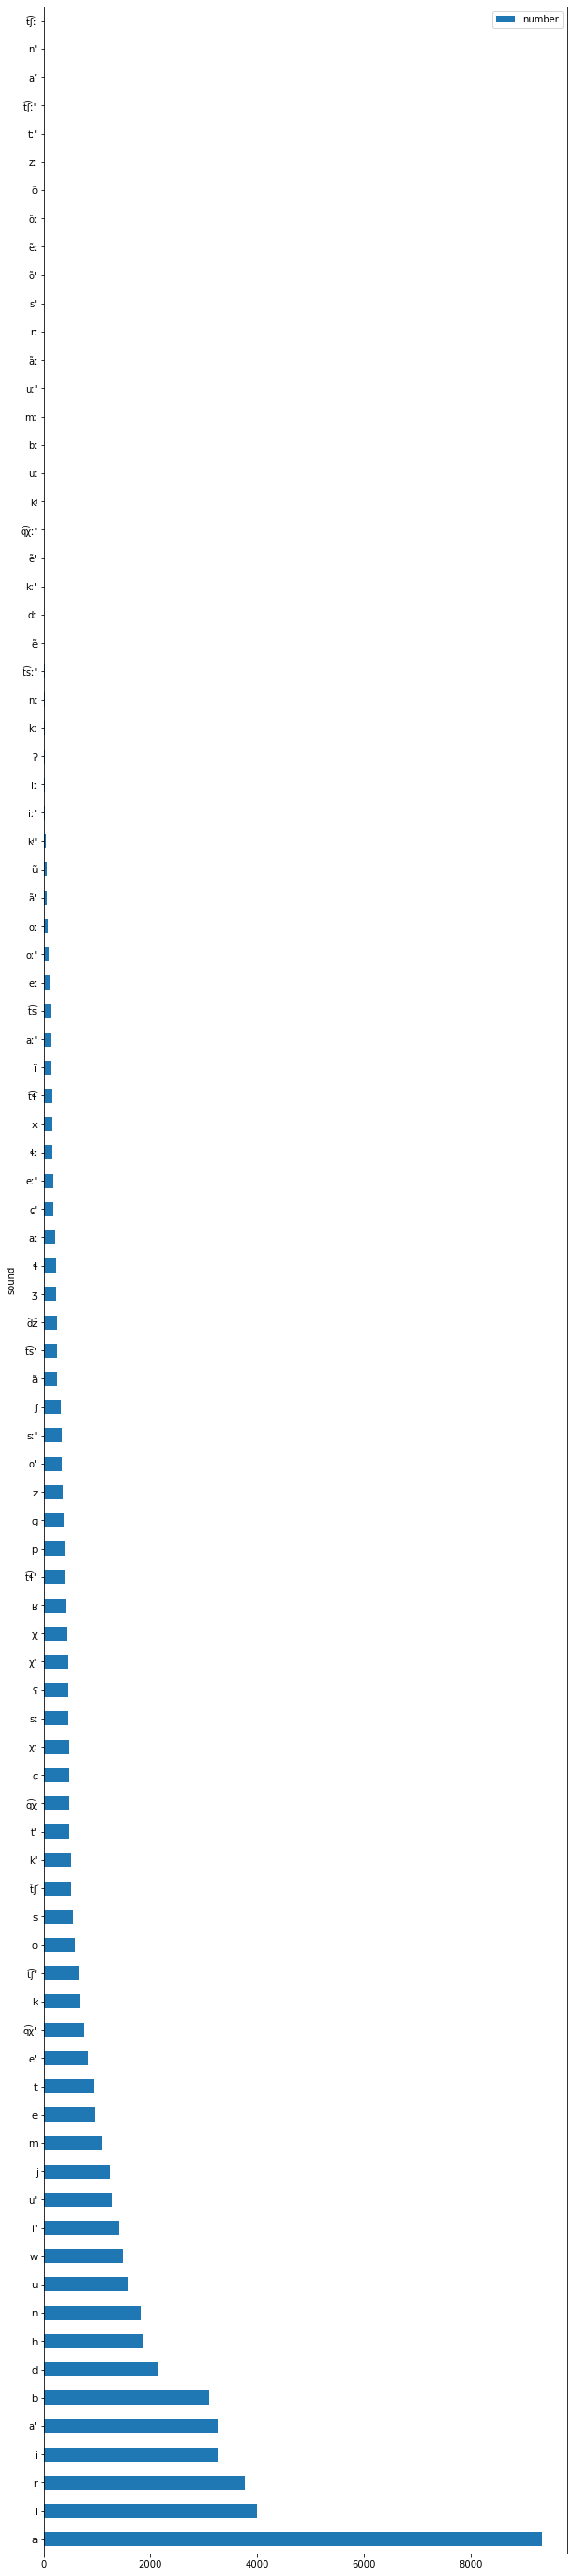

In [331]:
sounds_df.plot.barh(x = 'sound', y = 'number', figsize = [10, 50])

In [332]:
vwls = ['a', 'aː', 'ã', 'ãː', 'a’', 'e', 'eː', 'ẽ', 'ẽː', 'i', 'ĩ', 'o', 'oː', 'õ', 'õː', 'u', 'uː', 'ũ']
s_vwls = ["a'", "aː'", "ã'", "e'", "eː'", "ẽ'", "i'", "iː'", "o'", "oː'", "õ'", "u'", "uː'"]

cons = []
for sound in sounds_df['sound']:
    if (sound not in vwls) and (sound not in s_vwls):
        cons.append(sound)
        
print(cons)

['l', 'r', 'b', 'd', 'h', 'n', 'w', 'j', 'm', 't', "q͡χ'", 'k', "t͡ʃ'", 's', 't͡ʃ', "k'", "t'", 'q͡χ', 'ɕ', 'χː', 'sː', 'ʕ', "χ'", 'χ', 'ʁ', "t͡ɬ'", 'p', 'ɡ', 'z', "sː'", 'ʃ', "t͡s'", 'd͡z', 'ʒ', 'ɬ', "ɕ'", 'ɬː', 'x', 't͡ɬ', 't͡s', "kʲ'", 'lː', 'ʔ', 'kː', 'nː', "t͡sː'", 'dː', "kː'", "q͡χː'", 'kʲ', 'bː', 'mː', 'rː', "s'", 'zː', "tː'", "t͡ʃː'", "n'", 't͡ʃː']


# Инициали и финали

In [333]:
inits = []
len_inits = []

for ipa in df2['ipa']:
    an_init = []
    for sound in ipa.split('-'):
        if (sound in vwls) or (sound in s_vwls):
            if len(an_init) == 0:
                an_init.append('#')
                break
            else:
                break
        else:
            an_init.append(sound)
    inits.append(an_init)
            
for i in inits:
    if i[0] == '#':
        len_inits.append(0)
    else:
        len_inits.append(len(i))

In [335]:
fins = []
len_fins = []
for ipa in df2['ipa']:
    a_fin = []
    ipa = ipa.split('-')
    ipa.reverse()
    for s in ipa:
        if s in vwls or s in s_vwls:
            if len(a_fin) == 0:
                a_fin.append('#')
                break
            else:
                break
        else:
            a_fin.append(s) 
    a_fin.reverse()
    fins.append(a_fin)
    
for i in fins:
    if i[0] == '#':
        len_fins.append(0)
    else:
        len_fins.append(len(i))
        

In [336]:
df2['inits'] = inits
df2['len_inits'] = len_inits
df2['fins'] = fins
df2['len_fins'] = len_fins

In [337]:
df2['inits'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[b]               1158
[#]                919
[h]                534
[m]                359
[r]                344
                  ... 
[t͡ʃː]               1
[, χː]               1
[, t͡ʃ', χ, d]       1
[, sː]               1
[s, χ, n]            1
Name: inits, Length: 91, dtype: int64

In [339]:
df2['len_inits'].value_counts()

1    6690
0     919
2     456
3       6
4       1
Name: len_inits, dtype: int64

In [340]:
df2['len_fins'].value_counts()

1    4407
0    3437
2     222
3       6
Name: len_fins, dtype: int64

# Интервокальные кластеры

In [341]:
inters = []
len_inters = []

for ipa in df2['ipa']:
    for vwl in s_vwls:
        ipa = ipa.replace(vwl, 'V')
    for vwl in vwls:
        ipa = ipa.replace(vwl, 'V')
    intervoc =  re.findall('V(.+?)V', ipa)
    new_intervoc = []
    for inter in intervoc:
        inter = inter.replace('-', '')
        new_intervoc.append(inter)
    inters.append(new_intervoc)

for inter in inters:
    len_inters.append(len(inter))

In [342]:
for_all = {}
for_all['id'] = df['id']
for_all['language'] = df['language']
for_all['glottolog'] = df['glottolog']
for_all['reference'] = df['reference']
for_all['lemma'] = df['lemma_source']
for_all['ipa'] = df2['ipa']
for_all['initials'] = df2['inits']
for_all['init_length'] = df2['len_inits']
for_all['finals'] = df2['fins']
for_all['fin_length'] = df2['len_fins']
#for_all['borrowing'] = df['borrowing']
for_all['intervocal clusters'] = inters
for_all['inter_length'] = len_inters
for_all['dialect'] = df['dialect']
for_all['meaning'] = df['translation_ru']
for_all['contributor'] = df['contributor']

df_all = pd.DataFrame(for_all)
df_all

,id,language,glottolog,reference,lemma,ipa,initials,init_length,finals,fin_length,intervocal clusters,inter_length,dialect,meaning,contributor
0,521,Bagvalal,bagv1239,Magomedova 2004,АБ,a-b,[#],0,[b],1,[],0,,"местн. указ. этот, эта, это (указывает на об...",A. Davidenko
1,522,Bagvalal,bagv1239,Magomedova 2004,АБÁГВАН,a-b-a'-ɡ-w-a-n,[#],0,[n],1,[b],1,,анат. I) лопатка ) плечо; абáгван гьалāх ид...,A. Davidenko
2,523,Bagvalal,bagv1239,Magomedova 2004,АБÁГЬАР,a-b-a'-h-a-r,[#],0,[r],1,[b],1,,". масд. гл. абáгьила . отек, вздутие",A. Davidenko
3,524,Bagvalal,bagv1239,Magomedova 2004,А/Б/ÁГЬИ/ЛА,a-b-a'-h-i-l-a,[#],0,[#],0,"[b, l]",2,,опухать; отекать; дир с̄ĪӣкIиби арагье́̄х ...,A. Davidenko
4,525,Bagvalal,bagv1239,Magomedova 2004,АБАД́ИЙА/Б,a-b-a-d-i'-j-a-b,[#],0,[b],1,"[b, j]",2,,"вечный, нескончаемый; абадӣйаб ахӣрат ида в...",A. Davidenko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,8261,Bagvalal,bagv1239,Magomedova 2004,́ЭЩЕЩИ/НА,e'-ɕ-e-ɕ-i-n-a,[#],0,[#],0,"[ɕ, n]",2,,многокр. надевать на себя (головной убор),A. Davidenko
8068,8262,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА¹,e'-ɕ-i-l-a,[#],0,[#],0,[ɕ],1,,"I. закрываться, запираться, быть запертым;...",A. Davidenko
8069,8263,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/ЛА²,e'-ɕ-i-l-a,[#],0,[#],0,[ɕ],1,,"ткать; палáс эщила выткать палас; кван., ...",A. Davidenko
8070,8264,Bagvalal,bagv1239,Magomedova 2004,́ЭЩИ/НА,e'-ɕ-i-n-a,[#],0,[#],0,[ɕ],1,,надевать на себя (головной убор); бýтуна...,A. Davidenko


In [343]:
df_all.to_csv('bagv_data.csv')